In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from utility_functions import *

In [2]:
df = pd.read_csv('../../Data/data_16_runs/diffusion_181_coefficients.csv')
df.head()

,z,Q,RPM,diffusion_coefficient
0,0.004722,5,45.0,0.000009
1,0.010347,5,45.0,0.000008
2,0.015973,5,45.0,0.000008
3,0.021597,5,45.0,0.000008
4,0.027219,5,45.0,0.000008


In [3]:
df.shape

(3077, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3077 entries, 0 to 3076
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   z                      3077 non-null   float64
 1   Q                      3077 non-null   int64  
 2   RPM                    3077 non-null   float64
 3   diffusion_coefficient  3077 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 96.3 KB


In [5]:
valid1 = df[(df['Q'] == 3) & (df['RPM'] == 55)]
valid2 = df[(df['Q'] == 3) & (df['RPM'] == 75)]
valid3 = df[(df['Q'] == 4) & (df['RPM'] == 45)]

valid_data = pd.concat([valid1, valid2, valid3], axis=0)
valid_data.head()

,z,Q,RPM,diffusion_coefficient
1448,0.004722,3,55.0,0.000010
1449,0.010347,3,55.0,0.000010
1450,0.015973,3,55.0,0.000009
1451,0.021597,3,55.0,0.000009
1452,0.027219,3,55.0,0.000009


In [6]:
valid_data.shape

(543, 4)

In [7]:
valid_idx = valid_data.index.to_list()

In [8]:
train_data = df.drop(valid_idx, axis=0)
train_data.shape

(2534, 4)

In [9]:
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

In [10]:
X_train = train_data.drop(['diffusion_coefficient'], axis=1)
y_train = train_data['diffusion_coefficient']

X_valid = valid_data.drop(['diffusion_coefficient'], axis=1)
y_valid = valid_data['diffusion_coefficient']

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(2534, 3) (2534,) (543, 3) (543,)


In [11]:
valid_cols = ['3_55', '3_75', '4_45']

The train NRMSE is: 0.031147977986013545
The valid NRMSE is: 0.06592144421929465


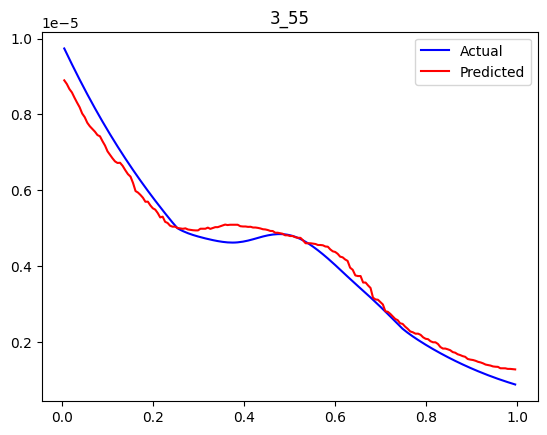

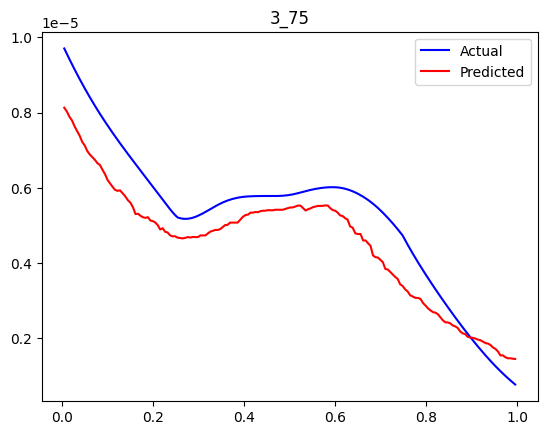

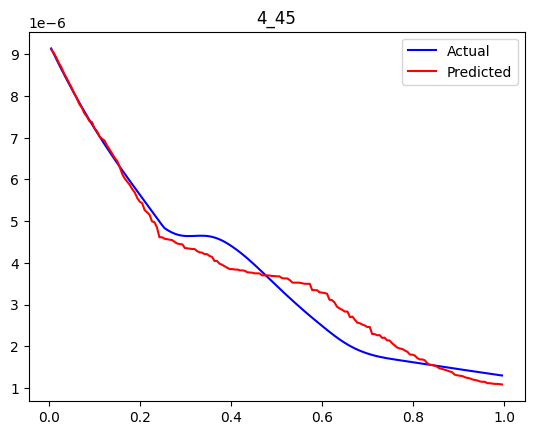

In [12]:
model = GradientBoostingRegressor(learning_rate = 0.05, n_estimators = 200, subsample = 0.8, max_features = 2,
                                  min_samples_split = 36, random_state = 42)

check_performance(model, X_train, y_train, X_valid, y_valid, valid_cols)

In [ ]:
train_pred = model.predict(X_train)
diffusion_181_train_predictions = train_data.copy()
diffusion_181_train_predictions['diffusion_coefficient'] = train_pred
diffusion_181_train_predictions.to_csv('../../Data/data_16_runs/predictions/diffusion_181_train_predictions.csv',
                                       index=False)

The train NRMSE is: 0.027450955429703272
The valid NRMSE is: 0.06971511859251599


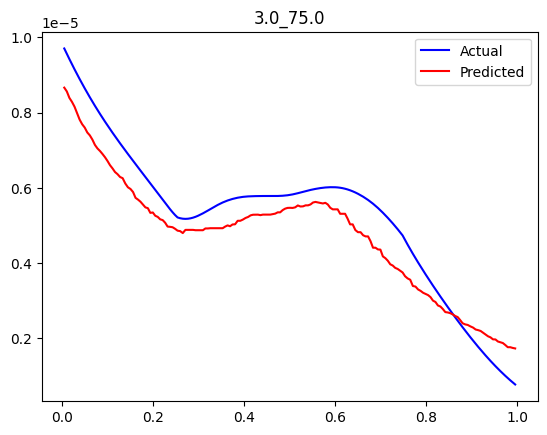

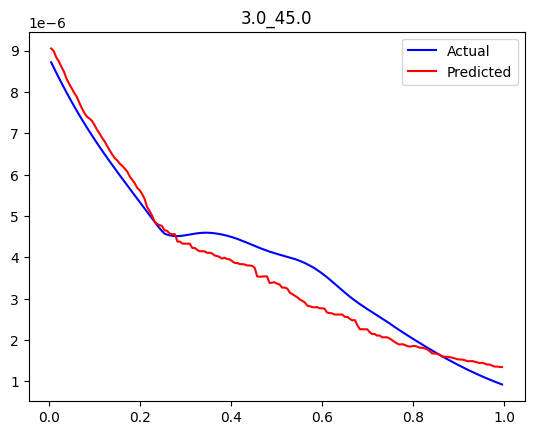

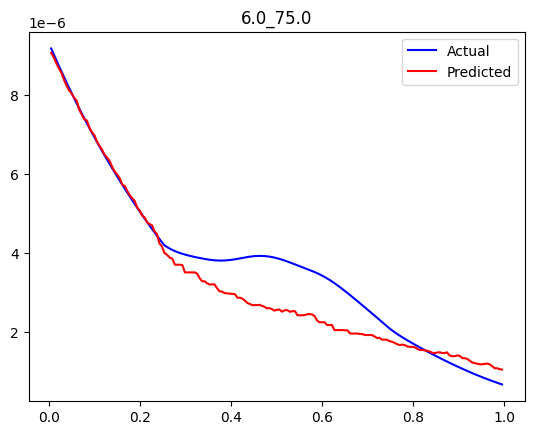

In [13]:
random_predictions(df, 'diffusion_coefficient')

In [14]:
y_pred = model.predict(X_valid)

diffusion_coefficient_predictions = pd.DataFrame({'z': valid_data['z'],
                                           'Q': valid_data['Q'],
                                           'RPM': valid_data['RPM'],
                                           'diffusion_coefficient': y_pred})

diffusion_coefficient_predictions.head()

,z,Q,RPM,diffusion_coefficient
0,0.004722,3,55.0,0.000009
1,0.010347,3,55.0,0.000009
2,0.015973,3,55.0,0.000009
3,0.021597,3,55.0,0.000009
4,0.027219,3,55.0,0.000008


In [16]:
diffusion_coefficient_predictions.shape

(543, 4)

In [17]:
diffusion_coefficient_predictions.to_csv('../../Data/data_16_runs/diffusion_coefficient_predictions.csv', index=False)

In [2]:
df = pd.read_csv('../../Data/data_16_runs/diffusion_1_coefficients.csv')
df

,Q,RPM,diffusion_coefficient
0,5,45.0,0.000006
1,5,55.0,0.000006
2,5,65.0,0.000007
3,5,75.0,0.000005
4,3,45.0,0.000005
5,4,45.0,0.000006
6,5,45.0,0.000006
7,6,45.0,0.000005
8,3,55.0,0.000006
9,3,65.0,0.000006


In [3]:
valid1 = df[(df['Q'] == 3) & (df['RPM'] == 55)]
valid2 = df[(df['Q'] == 3) & (df['RPM'] == 75)]
valid3 = df[(df['Q'] == 4) & (df['RPM'] == 45)]

valid_data = pd.concat([valid1, valid2, valid3], axis=0)
valid_data.head()

,Q,RPM,diffusion_coefficient
8,3,55.0,0.000006
10,3,75.0,0.000006
5,4,45.0,0.000006


In [4]:
valid_idx = valid_data.index.to_list()

train_data = df.drop(valid_idx, axis=0)
train_data.shape

(14, 3)

In [5]:
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

In [6]:
X_train = train_data.drop(['diffusion_coefficient'], axis=1)
y_train = train_data['diffusion_coefficient']

X_valid = valid_data.drop(['diffusion_coefficient'], axis=1)
y_valid = valid_data['diffusion_coefficient']

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(14, 2) (14,) (3, 2) (3,)


In [7]:
valid_cols = ['3_55', '3_75', '4_45']

In [13]:
model = GradientBoostingRegressor(random_state = 42)

model.fit(X_train, y_train)

train_pred = model.predict(X_train)
y_pred = model.predict(X_valid)

print(np.sqrt(mean_squared_error(y_train, train_pred))/(np.max(y_train) - np.min(y_train)))
print(np.sqrt(mean_squared_error(y_valid, y_pred))/(np.max(y_valid) - np.min(y_valid)))

0.12660528706828622
1.7630626945514694


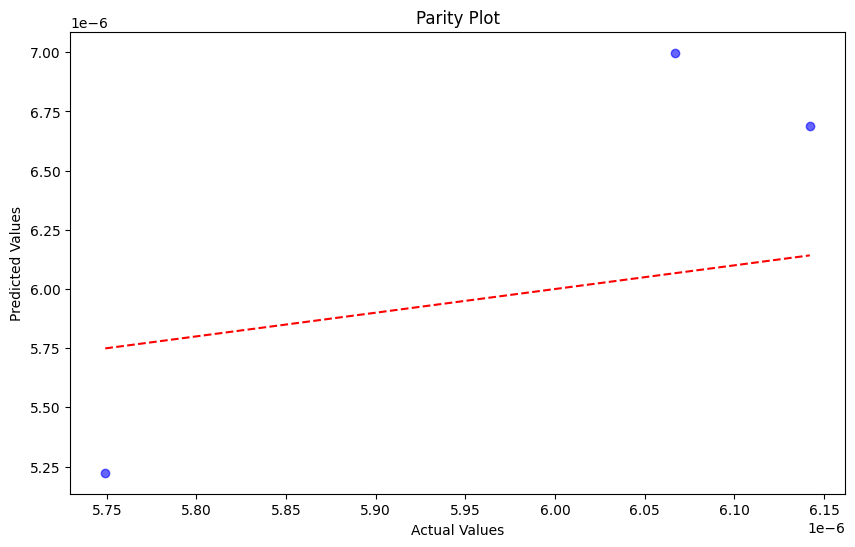

In [11]:
plt.figure(figsize=(10, 6))

plt.scatter(y_valid, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Parity Plot')
plt.show()

In [22]:
model = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 10, random_state = 42)

model.fit(X_train, y_train)

train_pred = model.predict(X_train)
y_pred = model.predict(X_valid)

print(np.sqrt(mean_squared_error(y_train, train_pred))/(np.max(y_train) - np.min(y_train)))
print(np.sqrt(mean_squared_error(y_valid, y_pred))/(np.max(y_valid) - np.min(y_valid)))

0.25094074824067986
0.9362884730467598


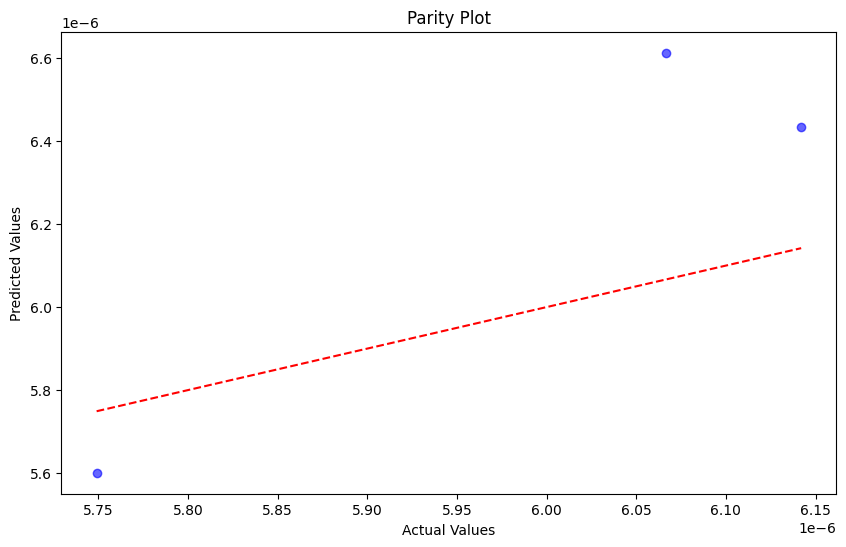

In [23]:
plt.figure(figsize=(10, 6))

plt.scatter(y_valid, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Parity Plot')
plt.show()

In [25]:
model = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 10, subsample = 0.5, random_state = 42)

model.fit(X_train, y_train)

train_pred = model.predict(X_train)
y_pred = model.predict(X_valid)

print(np.sqrt(mean_squared_error(y_train, train_pred))/(np.max(y_train) - np.min(y_train)))
print(np.sqrt(mean_squared_error(y_valid, y_pred))/(np.max(y_valid) - np.min(y_valid)))

0.26044024427139817
0.7928936103909177


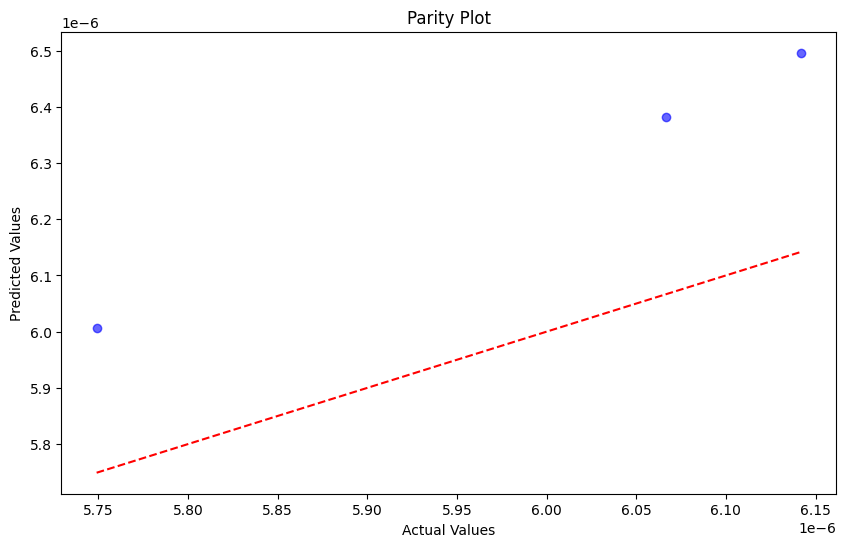

In [26]:
plt.figure(figsize=(10, 6))

plt.scatter(y_valid, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Parity Plot')
plt.show()

In [34]:
model = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 5, subsample = 0.5, random_state = 42)

model.fit(X_train, y_train)

train_pred = model.predict(X_train)
y_pred = model.predict(X_valid)

print(np.sqrt(mean_squared_error(y_train, train_pred))/(np.max(y_train) - np.min(y_train)))
print(np.sqrt(mean_squared_error(y_valid, y_pred))/(np.max(y_valid) - np.min(y_valid)))

0.30272702014563685
0.5579212757511002


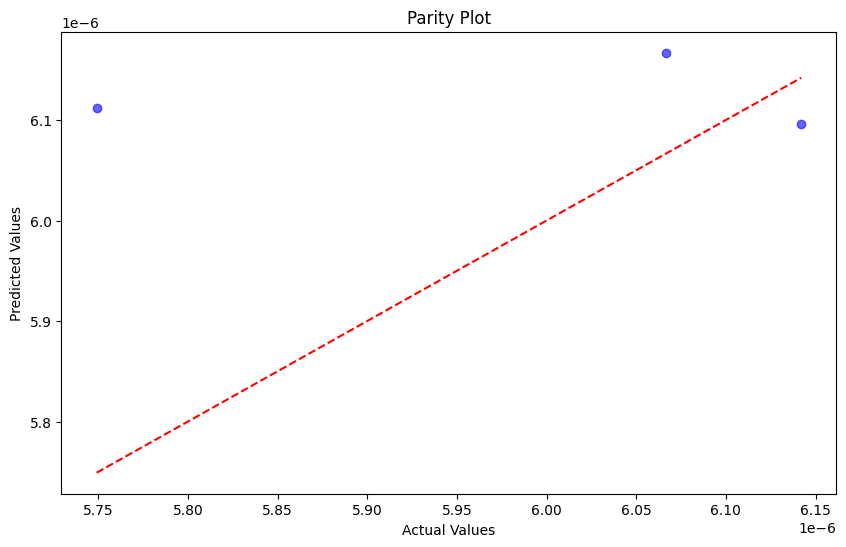

In [35]:
plt.figure(figsize=(10, 6))

plt.scatter(y_valid, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Parity Plot')
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

model.fit(X_train, y_train)
train_pred = model.predict(X_train)
y_pred = model.predict(X_valid)

print(np.sqrt(mean_squared_error(y_train, train_pred))/(np.max(y_train) - np.min(y_train)))
print(np.sqrt(mean_squared_error(y_valid, y_pred))/(np.max(y_valid) - np.min(y_valid)))

0.30407801416098074
0.6368578965696526


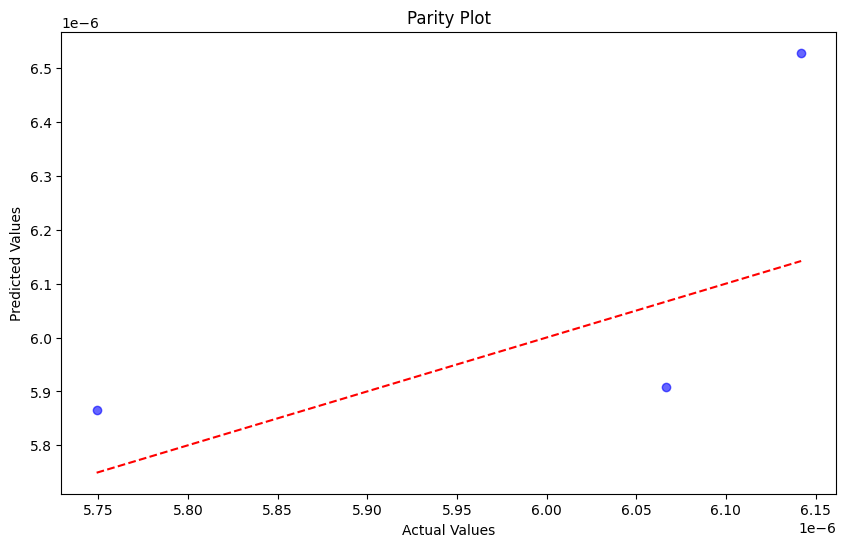

In [38]:
plt.figure(figsize=(10, 6))

plt.scatter(y_valid, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Parity Plot')
plt.show()

In [39]:
y_pred

array([5.90864480e-06, 6.52850185e-06, 5.86494925e-06])

In [40]:
y_pred = model.predict(X_valid)
print(y_pred)

diffusion_coefficient_predictions = pd.DataFrame({'Q': valid_data['Q'],
                                           'RPM': valid_data['RPM'],
                                           'diffusion_coefficient': y_pred})

diffusion_coefficient_predictions.head()

[5.90864480e-06 6.52850185e-06 5.86494925e-06]


,Q,RPM,diffusion_coefficient
0,3,55.0,0.000006
1,3,75.0,0.000007
2,4,45.0,0.000006


In [ ]:
diffusion_coefficient_predictions.to_csv('../../Data/data_16_runs/diffusion_coefficient_1_predictions.csv', index=False)

In [17]:
df = pd.read_csv('../../Data/data_16_runs/dc_1_1017.csv')
df.head()

,Q,RPM,D
0,5.000000e-07,45,0.000007
1,5.000000e-07,55,0.000007
2,5.000000e-07,65,0.000011
3,5.000000e-07,75,0.000007
4,3.000000e-07,45,0.000007


In [18]:
df

,Q,RPM,D
0,5.000000e-07,45,0.000007
1,5.000000e-07,55,0.000007
2,5.000000e-07,65,0.000011
3,5.000000e-07,75,0.000007
4,3.000000e-07,45,0.000007
5,4.000000e-07,45,0.000007
6,5.000000e-07,45,0.000006
7,6.000000e-07,45,0.000005
8,3.000000e-07,55,0.000007
9,3.000000e-07,65,0.000006


In [19]:
df['Q'] = df['Q'] * 10e6

In [20]:
df

,Q,RPM,D
0,5.0,45,0.000007
1,5.0,55,0.000007
2,5.0,65,0.000011
3,5.0,75,0.000007
4,3.0,45,0.000007
5,4.0,45,0.000007
6,5.0,45,0.000006
7,6.0,45,0.000005
8,3.0,55,0.000007
9,3.0,65,0.000006


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q       17 non-null     float64
 1   RPM     17 non-null     int64  
 2   D       17 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 536.0 bytes


In [22]:
valid1 = df[(df['Q'] == 3) & (df['RPM'] == 55)]
valid2 = df[(df['Q'] == 3) & (df['RPM'] == 75)]
valid3 = df[(df['Q'] == 4) & (df['RPM'] == 45)]

valid_data = pd.concat([valid1, valid2, valid3], axis=0)
valid_data.head()

,Q,RPM,D
8,3.0,55,0.000007
10,3.0,75,0.000008
5,4.0,45,0.000007


In [23]:
valid_idx = valid_data.index.to_list()

train_data = df.drop(valid_idx, axis=0)
train_data.shape

(14, 3)

In [24]:
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

In [26]:
X_train = train_data.drop(['D'], axis=1)
y_train = train_data['D']

X_valid = valid_data.drop(['D'], axis=1)
y_valid = valid_data['D']

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(14, 2) (14,) (3, 2) (3,)


In [27]:
model = LinearRegression()

model.fit(X_train, y_train)
train_pred = model.predict(X_train)
y_pred = model.predict(X_valid)

print(np.sqrt(mean_squared_error(y_train, train_pred))/(np.max(y_train) - np.min(y_train)))
print(np.sqrt(mean_squared_error(y_valid, y_pred))/(np.max(y_valid) - np.min(y_valid)))

0.2705618394040515
0.35441786561033417


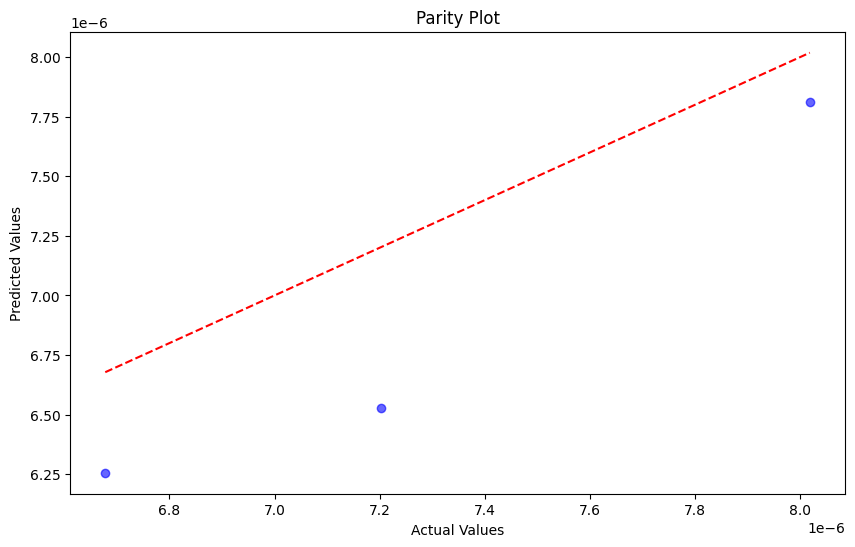

In [28]:
plt.figure(figsize=(10, 6))

plt.scatter(y_valid, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Parity Plot')
plt.show()

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_valid, y_pred)

0.2578543531408002

In [31]:
r2_score(y_train, train_pred)

0.23940809304824007

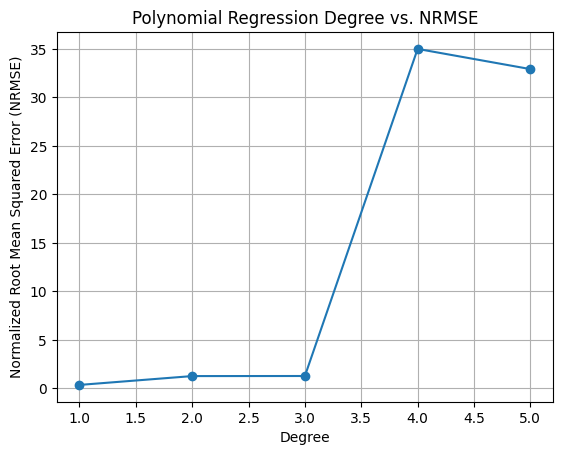

In [36]:
from sklearn.preprocessing import PolynomialFeatures

degrees = [1, 2, 3, 4, 5]

# Dictionary to store results
results = {'degree': [], 'NRMSE': []}

for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict values for the test set
    X_test_poly = poly_features.transform(X_valid)
    y_pred = model.predict(X_test_poly)
    
    # Calculate Mean Squared Error (MSE)
    nrmse = np.sqrt(mean_squared_error(y_valid, y_pred))/(np.max(y_valid) - np.min(y_valid))
    
    results['degree'].append(degree)
    results['NRMSE'].append(nrmse)

# Plot the results
plt.plot(results['degree'], results['NRMSE'], marker='o')
plt.xlabel('Degree')
plt.ylabel('Normalized Root Mean Squared Error (NRMSE)')
plt.title('Polynomial Regression Degree vs. NRMSE')
plt.grid()
plt.show()

In [35]:
results

{'degree': [1, 2, 3, 4, 5],
 'NRMSE': [0.35441786561033484,
  1.2655185225047747,
  1.2734941347099211,
  34.9896488586738,
  32.91018863157649]}

In [37]:
model = LinearRegression()

model.fit(X_train, y_train)
train_pred = model.predict(X_train)
y_pred = model.predict(X_valid)

print(np.sqrt(mean_squared_error(y_train, train_pred))/(np.max(y_train) - np.min(y_train)))
print(np.sqrt(mean_squared_error(y_valid, y_pred))/(np.max(y_valid) - np.min(y_valid)))

0.2705618394040515
0.35441786561033417


In [38]:
y_pred

array([6.52769568e-06, 7.81234223e-06, 6.25624243e-06])

In [39]:
y_pred = model.predict(X_valid)
print(y_pred)

diffusion_coefficient_predictions = pd.DataFrame({'Q': valid_data['Q'],
                                           'RPM': valid_data['RPM'],
                                           'diffusion_coefficient': y_pred})

diffusion_coefficient_predictions.head()

[6.52769568e-06 7.81234223e-06 6.25624243e-06]


,Q,RPM,diffusion_coefficient
0,3.0,55,0.000007
1,3.0,75,0.000008
2,4.0,45,0.000006


In [40]:
diffusion_coefficient_predictions.to_csv('../../Data/data_16_runs/dc_1_1017_predictions.csv', index=False)